# 5a. Root finding

**Exercise 1:** Compared to Newton's Method, there is a far more elementary and reliable method of root finding called the **subdivision** technique.  Say you are trying to find the roots $f(x)=0$ of a continuous function $f : [a,b] \to \mathbb R$.  The values of the function $f(a)$ and $f(b)$ have opposite signs, i.e. $f(a)f(b)<0$. One computes the midpoint $t_0 = \frac{a+b}{2}$.  If $f(t_0)=0$, you are done.  So assume $f(t_0) \neq 0$.  Then either 

a. $f(a)f(t_0)<0$ or 

b. $f(t_0)f(b)<0$.    

If (a) is true, then replace the interval $[a,b]$ with $[a,t_0]$.  If (b) is true, replace the interval $[a,b]$ with $[t_0, b]$.  One repeats this technique until the length of the interval is shorter than whatever kind of accuracy you need for your answer.  The [intermediate value theorem](https://en.wikipedia.org/wiki/Intermediate_value_theorem) guarantees that a root of your equation is in your interval.

(a) Create a visualization of the subdivision technique for finding roots of equations, similar to **plotNewt** from class.  Try it on $f(x)=x^2-2$.

(b) For $f(x)=x^2-2$, if your initial interval is $[1,2]$, how many iterations does it take to estimate $\sqrt{2}$ to within $1/10^8$?  Compare that to Newton's method with initial guess $x_0 = 1$, or $x_0 = 2$.  




In [26]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

x = sp.Symbol('x')
f = sp.Function('f')

In [96]:
def subdivision2(f,x,a,b):
    '''
    '''
    F = sp.lambdify(x,f) #Turns f into a callable function for Python.
    tol  = np.exp(-8)
    lista = [a]
    listb = [b]
    listy = [0]
    
    if F(a)*F(b) > 0:
        return print("f(a) and f(b) do not have opposite sign")
    
    t = (a+b)/2
    ## Plot the zero line with initial points
    plt.plot([a, b], [0.0, 0.0], 'k-', alpha=0.4, label='zero')
    
    count1 = 0
    while abs(F(t)) >= tol:
        if abs(F(t)) <= tol:
            return count1
        elif F(a)*F(t) < 0:
            count1 += 1
            b = t
            listb.append(b)
            lista.append(a)
            listy.append(count1)
            t = (a+b)/2
        elif F(t)*F(b) < 0 :
            count1 += 1
            a = t
            lista.append(a)
            listb.append(b)
            listy.append(count1)
            t = (a+b)/2
    print("count =",count1)
    
    
    #Plot the points
    plt.plot(lista, listy, '-o', alpha = 0.6, label = "a")
    plt.plot(listb, listy, '-o', alpha = 0.6, label = "b")
    plt.plot([lista[0]], [0.0], 'go', alpha=0.6, label="initial pt")
    plt.plot([listb[0]], [0.0], 'go', alpha=0.6)
    plt.plot([lista[-1]], [listy[-1]], 'ro', alpha=0.6, label="end pt")
    
    
    ## Label
    plt.xlabel("x")
    plt.ylabel('Count')
    plt.legend()

count = 11


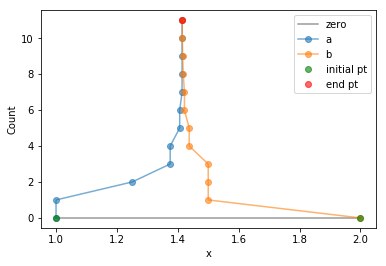

In [98]:
subdivision2(x**2 - 2, x, 1, 2)

In [105]:
def Newt(f, x, x0):
    '''
    Newton's method
    Return: count
    '''
    F = sp.lambdify(x,f)
    N = x - F(x)/F(x).diff(x)
    count = 0
    
    Nsq = N.doit()
    Nsq.simplify()
    print(Nsq)

In [106]:
Newt(x**2 -2, x, 0)

x - (x**2 - 2)/(2*x)


----

**Exercise 2:** This exercise asks you to create a plot of *how long* it takes Newton's method to find a root. Specifically, take Newton's method for the roots $x^2-2=0$.  On the interval $[-2,2]$ plot the function $N(x)$ which is the number of iterations it takes for Newton's method to get to within $1/10^8$ of a root.  Plot in one color if the root you are approximating is $\sqrt{2}$, and another if you are approximating $-\sqrt{2}$. 


In [ ]:
def N(f, x, x0, n)
    

----

**Exercise 3:** Repeat exercise 2 but for the subdivision technique.  Plot $N(x)$ the number of iterations it takes the subdivision technique to get within $1/10^8$ of a root, provided the initial interval is $[x-1, x+1]$. If the method fails to produce a root, do not plot a point.   Include a plot of $x^2-2$ so that your plot is directly comparable to Exercise 2.
